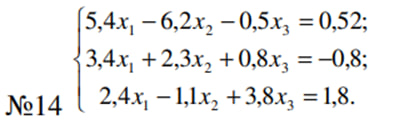

## <b><span style='color:#F1C40F'>|</span> метод Зейделя </b>

In [1]:
#функція яка обчислює добуток всіх елементів в ітерабельному об'єкті. 
#Вона використовується для обчислення добутків елементів рядків матриці.
from math import prod

#функція permutations, яка генерує всі можливі перестановки заданої довжини послідовності.
#Вона використовується для пошуку найбільшого добутку елементів рядків матриці.
from itertools import permutations

#У даному випадку, використовується функція deepcopy, яка створює глибоку копію об'єкту. 
#Вона використовується для створення копій матриці X та її попередньої версії.
from copy import deepcopy

import numpy as np

def gauss_seidel_combined(A, C, X, epsilon=0.001, max_iteration=1000000):
    # Отримуємо розмірність матриці
    n = len(A)
    
    # Шукаємо найбільший добуток елементів по рядках
    max_prod = -1
    biggest_order = None
    for order in permutations(range(n)):
        current_prod = prod(A[j][k] for k, j in enumerate(order))
        if abs(current_prod) > max_prod:
            max_prod = abs(current_prod)
            biggest_order = order
    
    # Застосовуємо отриманий порядок до матриць A та C
    if biggest_order is not None:
        A = [A[i] for i in biggest_order]
        C = [C[i] for i in biggest_order]
    
    # Копіюємо матрицю X та ініціалізуємо попередню копію
    X, prev_X = deepcopy(X), X

    for _ in range(max_iteration):
        for i in range(n):
            # Обчислюємо нові значення X
            X[i][0] = (C[i][0] - sum(A[i][j] * X[j][0] for j in range(n) if j != i)) / A[i][i]

        # Перевіряємо умову зупинки за точністю
        if all(abs(X[j][0] - prev_X[j][0]) <= epsilon for j in range(n)):
            return X

        # Оновлюємо попередню копію X
        prev_X = deepcopy(X)

    # Повертаємо останнє знайдене значення X
    return X

In [7]:
A = np.array([[5.4, -6.2, -0.5],
              [3.4, 2.3, 0.8],
              [2.4, -1.1, 3.8]])

b = np.array([0.52, -0.8, 1.8])
X = np.zeros_like(b)

solution = gauss_seidel_combined(A, b.reshape(-1, 1), X.reshape(-1, 1))
solution

array([[-0.16920403],
       [-0.27174148],
       [ 0.50188791]])

## <b><span style='color:#F1C40F'>|</span> метод простої ітерації </b>

In [5]:
import numpy as np

def it(A, b, x0, omega, tol=1e-6, max_iter=1000):
    # Отримуємо розмірність системи
    n = len(b)
    
    # Копіюємо початкове наближення
    x = x0.copy()

    for _ in range(max_iter):
        # Ініціалізуємо нове наближення
        x_new = np.zeros_like(x)
        
        # Проводимо обчислення для кожного рядка системи
        for i in range(n):
            # Обчислюємо суму залежностей від вже відомих значень x
            s = np.dot(A[i, :i], x_new[:i]) + np.dot(A[i, i + 1:], x[i + 1:])
            
            # Обчислюємо нове наближення x[i]
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - s)

        # Перевіряємо умову зупинки за нормою різниці між x та x_new
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        
        # Оновлюємо поточне наближення
        x = x_new

    # Якщо метод не зійшовся, викидаємо виняток
    raise ValueError("method did not converge within maximum iterations.")

In [6]:
A = np.array([[5.4, -6.2, -0.5],
              [3.4, 2.3, 0.8],
              [2.4, -1.1, 3.8]])
b = np.array([0.52, -0.8, 1.8])
x0 = np.zeros_like(b)
omega = 0.01  

solution = it(A, b, x0, omega, max_iter=2000)
solution

array([-0.16941921, -0.27192291,  0.50187809])